# GIỚI THIỆU ĐỀ TÀI
- Ngày nay, chi tiêu marketing trong ngành ngân hàng rất lớn, đồng nghĩa với việc các ngân hàng cần tối ưu hóa chiến lược marketing và nâng cao hiệu quả. Hiểu được nhu cầu của khách hàng sẽ dẫn đến các kế hoạch tiếp thị hiệu quả hơn, thiết kế sản phẩm thông minh hơn và sự hài lòng của khách hàng cao hơn.  
- Mục tiêu của Project này là phân tích bộ dữ liệu về các thông số của khách  hàng để có được cái nhìn tổng quát về khách hàng của công ty, cũng như có thể phân loại được những nhóm khách hàng nào ngân hàng có khả năng cao sẽ có phản ứng tốt với các chiến dịch tiếp thị- từ đó có thể tập trung nguồn lực vào nhóm khách hàng này nhằm nâng cao hiệu quả chiến dịch cũng như giảm thiểu những quảng cáo cho các nhóm khách hàng nhất định

## 1. Import Module

In [122]:

import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Đọc file dữ liệu
df = pd.read_csv('../accset/bank-full.csv')
df.head(5)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


### 1.1 Cấu trúc lại bộ dữ liệu


In [51]:
df.columns


Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')

In [53]:
# Tách cột 'BillNo;Itemname;Quantity;Date;Price;CustomerID;Country' thành các cột mới
df = pd.concat([df, df['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';', expand=True)], axis=1)

# Hiển thị DataFrame sau khi tách
df.head(3)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""",0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"58;""management"";""married"";""tertiary"";""no"";2143...",58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,"44;""technician"";""single"";""secondary"";""no"";29;""...",44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2...",33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""


In [55]:
# Xóa cột không cần thiết
df.drop('age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"', axis=1, inplace=True)
# Hiển thị kết quả
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""


In [56]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='object')

In [57]:
# Xóa ký hiệu " trong các giá trị của DataFrame
df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)
# Đặt lại tên cột theo danh sách mới
new_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
               'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response']
df.columns = new_columns
# hiển thị kết quả
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [64]:
# Chuyển đổi kiểu dữ liệu của các cột
df['age'] = df['age'].astype(int)
df['balance'] = df['balance'].astype(float)
df['day'] = df['day'].astype(int)
df['duration'] = df['duration'].astype(float)
df['campaign'] = df['campaign'].astype(int)
df['pdays'] = df['pdays'].astype(float)

# Thêm cột mới 'result_response' dựa trên cột 'response'
df['result_response'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0)

## 2. Mô tả các cột trong bộ dữ liệu
- Age, Job, Marital, Education: tình trạng nhân khẩu học của khách hàng
- Default: Khách hàng có nợ xấu hay không
- Balance: Mức độ tích lũy tiền trong tài khoản của một khách hàng trong một khoảng thời gian (một năm)
- Housing: Có vay mua nhà hay không
- Loan: Có vay cá nhân không
- Contract: Phương tiện liên lạc được sử dụng trong quá trình tiếp cận hoặc liên lạc với khách hàng hoặc người tham gia các chiến dịch tiếp thị, khảo sát, hay các hoạt động liên quan khác. Gồm 2 loại: Cellular (Điện thoại di động); Phone (Điện thoại cố định)
- Day: Ngày trong tuần khi một liên lạc cuối cùng đã được thực hiện.
- Month: tháng khi một liên lạc cuối cùng được thực hiện
- Duration: Thuộc tính mô tả thời lượng của cuộc gọi tính bằng phút cuối cùng trong một chiến dịch tiếp thị hoặc giao tiếp với khách hàng
- Campain: Thuộc tính mô tả số lượng lần liên lạc đã được thực hiện trong khuôn khổ chiến dịch cụ thể và đối với khách hàng cụ thể. Giá trị của thuộc tính này là một số nguyên và bao gồm cả cuộc liên lạc cuối cùng.
- PDays: Thuộc tính mô tả số ngày đã trôi qua kể từ lần liên lạc cuối cùng với khách hàng từ chiến dịch trước đó. Giá trị của thuộc tính này là một số nguyên, và nếu giá trị là -1, nghĩa là khách hàng không được liên lạc từ chiến dịch trước đó.
- Previous: Thuộc tính mô tả số lượng lần liên lạc đã được thực hiện trước chiến dịch hiện tại và đối với khách hàng cụ thể. Giá trị của thuộc tính này thường là một số nguyên, biểu thị tổng số lần liên lạc đã xảy ra trước khi bắt đầu chiến dịch hiện tại.
- POutCome: Thuộc tính mô tả kết quả của chiến dịch tiếp thị trước đó đối với khách hàng cụ thể. Giá trị của thuộc tính này thường thuộc một trong ba loại: Failure (Thất bại); Nonexistent (Không tồn tại); Success (Thành công)
- y: Kết quả của cuộc gọi điện ‘Yes’ - có; ‘No’ - Không

## 3. Cleaning data

In [65]:
#Kiểm tra giá trị NULL
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45211 non-null  int32  
 1   job              45211 non-null  object 
 2   marital          45211 non-null  object 
 3   education        45211 non-null  object 
 4   default          45211 non-null  object 
 5   balance          45211 non-null  float64
 6   housing          45211 non-null  object 
 7   loan             45211 non-null  object 
 8   contact          45211 non-null  object 
 9   day              45211 non-null  int32  
 10  month            45211 non-null  object 
 11  duration         45211 non-null  float64
 12  campaign         45211 non-null  int32  
 13  pdays            45211 non-null  float64
 14  previous         45211 non-null  object 
 15  poutcome         45211 non-null  object 
 16  response         45211 non-null  object 
 17  result_respo

Bộ dữ liệu không có giá trị NULL

### Xử lý Outlier trong cột balance


In [66]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [67]:
# Xóa outlier trong cột balance
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Chọn hằng số k 
k = 3
lower_fence = Q1 - k * IQR
upper_fence = Q3 + k * IQR

# Xác định và xử lý outlier
outliers = df[(df['balance'] < lower_fence) | (df['balance'] > upper_fence)]
df1 = df[(df['balance'] >= lower_fence) & (df['balance'] <= upper_fence)]


In [68]:
df1['balance'].describe()

count    42768.000000
mean       836.415614
std       1177.709871
min      -3372.000000
25%         57.000000
50%        393.000000
75%       1176.250000
max       5496.000000
Name: balance, dtype: float64

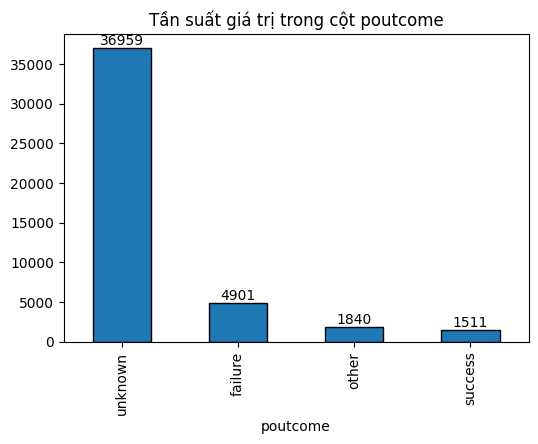

In [76]:
# Tính tần suất các giá trị trong cột "P Out Come"
response_counts = df['poutcome'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(6, 4))
response_counts.plot(kind='bar',  edgecolor='black')

# Hiển thị data label
for i, count in enumerate(response_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Thiết lập các thuộc tính của biểu đồ
plt.title('Tần suất giá trị trong cột poutcome')


# Hiển thị biểu đồ
plt.show()

In [77]:
# Tìm các hàng có giá trị 'other' trong cột 'poutcome' và thay đổi thành 'unknown'
df.loc[df['poutcome'] == 'other', 'poutcome'] = 'unknown'

### Transform data


In [80]:
# Xóa cột contact 
df= df.drop('contact', axis=1)

In [85]:
# Chuyển cột 'duration' từ giây sang phút
df['duration'] = df['duration'].apply(lambda x: x / 60)


In [87]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [88]:
# Tạo từ điển ánh xạ giữa tên tháng và số tháng
month_mapping = {'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'oct': 10, 'nov': 11, 'dec': 12,
                 'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'sep': 9}

# Thay đổi giá trị của cột 'month'
df['month'] = df['month'].map(month_mapping)

In [89]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

### Lọc dữ liệu

In [90]:
# Xóa những hàng có duration thấp hơn 5s
condition = df['duration'] <= 5/60

# Xóa các hàng thỏa mãn điều kiện
df.drop(df[condition].index, inplace=True)

In [91]:
# Xóa những hàng có education là 'other'
condition = df['education'] =='other'

# Xóa các hàng thõa điều kiện
df.drop(df[condition].index, inplace=True)

## EDA dữ liệu

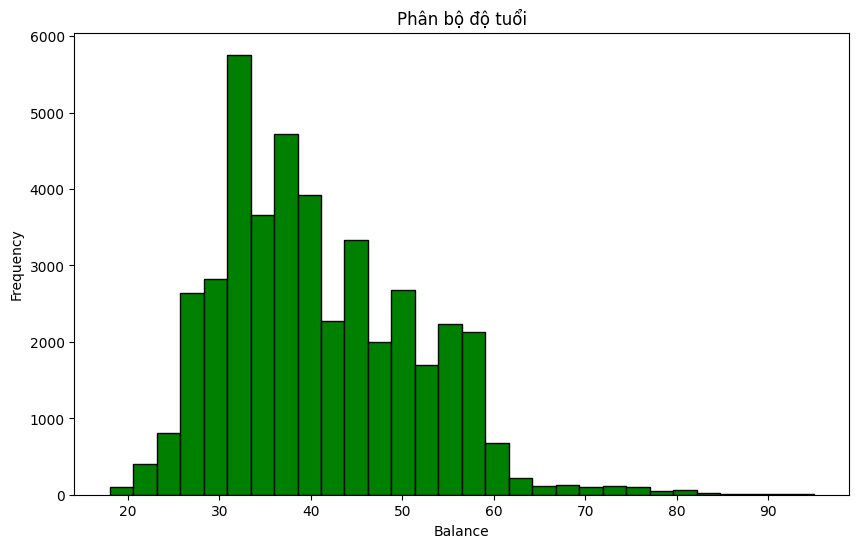

In [98]:
# Vẽ biểu đồ histogram cho cột 'age'
plt.figure(figsize=(10, 6))  # Đặt kích thước của hình vẽ

plt.hist(df1['age'], bins=30, color='green', edgecolor='black')  # Sử dụng 30 bins

# Đặt tên trục và tiêu đề biểu đồ
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Phân bộ độ tuổi')

# Hiển thị biểu đồ
plt.show()

In [99]:
df['age'].describe()

count    45149.000000
mean        40.944008
std         10.618255
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Phân tích tuổi:
- Ta thấy độ tuổi trong bộ dữ liệu phân bổ từ 18 - 95 tuổi
- Ta có thể chia bins cho tuổi như sau: <30 ; 30-39; 40-49; 50-59; >60


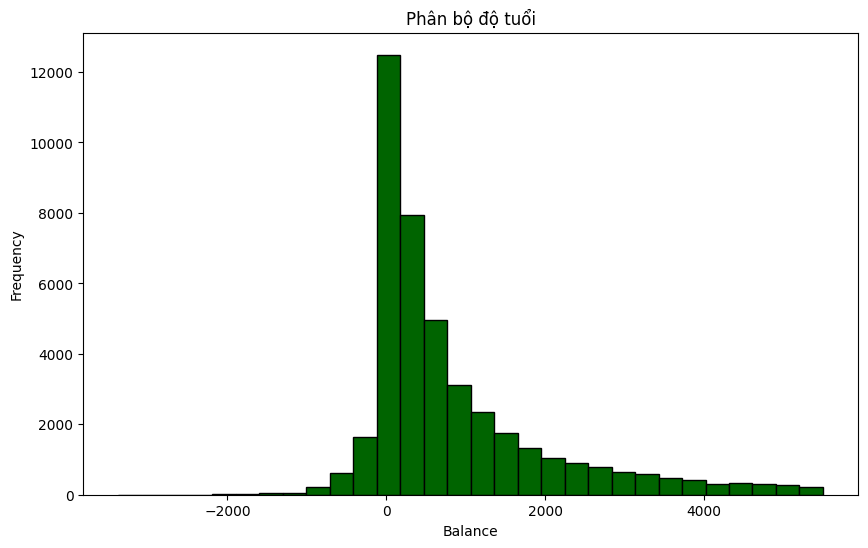

In [101]:
# Vẽ biểu đồ histogram cho cột 'balance'
plt.figure(figsize=(10, 6))  # Đặt kích thước của hình vẽ

plt.hist(df1['balance'], bins=30, color='darkgreen', edgecolor='black')  # Sử dụng 30 bins

# Đặt tên trục và tiêu đề biểu đồ
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Phân bộ độ tuổi')

# Hiển thị biểu đồ
plt.show()

In [102]:
df['balance'].describe()

count     45149.000000
mean       1362.417285
std        3045.000880
min       -8019.000000
25%          72.000000
50%         449.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Phân tích số dư:
* Ta thấy số dư trải dài từ -8019 đến 102127. Tạo ra phạm vi số dư khá rộng 94108. Sự phân bổ số dư có độ lệch chuẩn rất lớn so với giá trị trung bình, điều này chỉ ra mức độ biến động cao về số dư trong tài khoản của khách hàng. Sự đa dạng này có thể là kết quả của nhiều yếu tố khác nhau, chẳng hạn như thu nhập, chi tiêu, hoặc quản lý tài chính cá nhân của khách hàng.
* Ta có thể chia bins cho số dư như sau:

Nhỏ hơn 0: không có số dư

0 - <=1000: low balance

1000 - <=5000: average balance

Lớn hơn 5000: high balance


In [113]:
df[['duration','campaign']].describe()

,duration,campaign
count,45149.000000,45149.000000
mean,4.308532,2.764004
std,4.292205,3.096197
min,0.100000,1.000000
25%,1.716667,1.000000
50%,3.000000,2.000000
75%,5.316667,3.000000
max,81.966667,63.000000


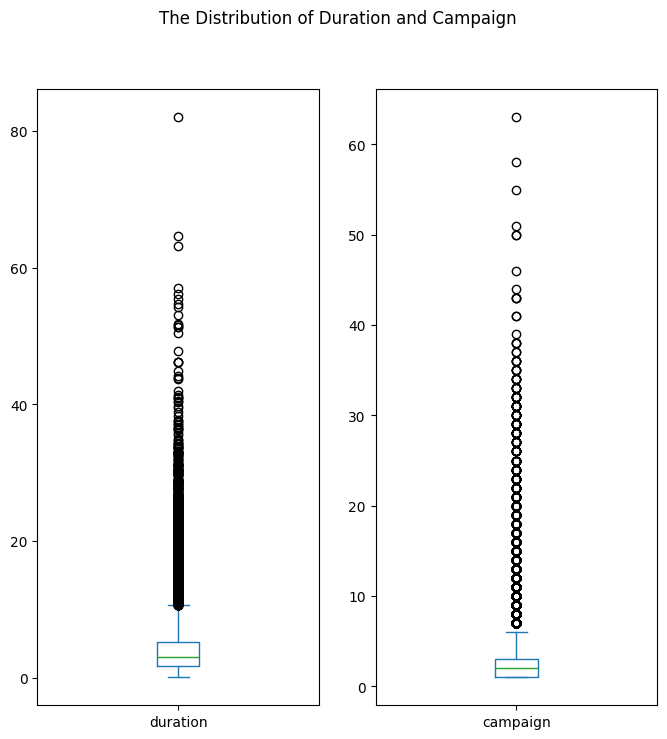

In [109]:
dist_dur_cam = df[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

Thời gian cuộc gọi và số lần liên hệ trong chiến dịch
- phân bổ thời gian cuộc gọi: Theo quan sát, thời gian tiếp xúc có trung bình là 3 phút, với phạm vi liên vùng từ 1,73 phút đến 5,3 phút. Biểu đồ hộp lệch trái cho biết hầu hết các cuộc gọi đều tương đối ngắn. Ngoài ra, có một số lượng lớn các giá trị ngoại lệ trong khoảng từ 10 phút đến 40 phút, rất đáng để nghiên cứu thêm.
- phân bổ số lần liên hệ trong chiến dịch: Khoảng một nửa số khách hàng đã được ngân hàng liên hệ lần thứ hai Hầu hết khách hàng đã được ngân hàng tiếp cận từ một đến ba lần, điều này là hợp lý. Tuy nhiên, một số khách hàng đã được liên hệ tới 58 lần, điều này không bình thường. Những khách hàng này có thể có một số nhu cầu đặc biệt cần liên lạc thường xuyên.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


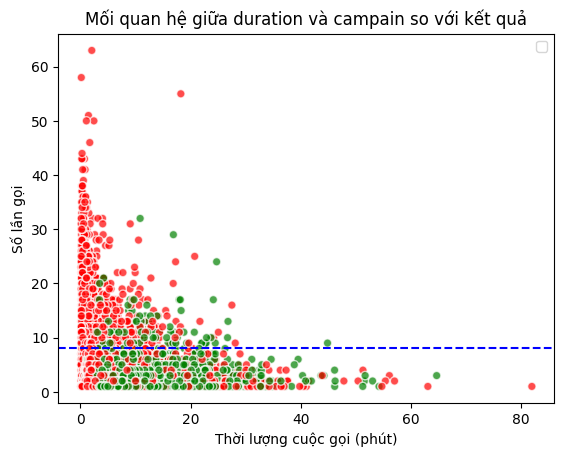

In [119]:
# Tạo một Figure và Axes
fig, ax = plt.subplots()

# Tạo các bong bóng với kích thước dựa trên 'duration' và 'campaign', màu sắc dựa trên 'response'
scatter = ax.scatter(df['duration'], df['campaign'], c=df['response'].map({'no': 'red', 'yes': 'green'}), alpha=0.7, edgecolors='w')

# Thêm legend
legend_labels = {'no': 'No Response', 'yes': 'Response'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(['red', 'green'], legend_labels.values())]
ax.legend(handles=legend_handles, title='Response')

# Đặt tên cho trục x, trục y và tiêu đề
ax.set_xlabel('Thời lượng cuộc gọi (phút)')
ax.set_ylabel('Số lần gọi')
ax.set_title('Mối quan hệ giữa duration và campain so với kết quả')

# Vẽ đường line cho số lần gọi bằng 10
ax.axhline(y=8, color='blue', linestyle='--')
ax.legend()

# Hiển thị biểu đồ
plt.show()

Phân tích mối quan hệ giữa duration và campaign:
- Qua biểu đồ trên ta thấy những khách hàng có response là 'yes' thường sẽ có số lần được gọi ít và thơi gian gọi dài. Trong khi nhóm khách hàng có response là 'no' thường sẽ được liên hệ nhiều và thời lượng cuộc gọi ngắn. Ta cũng có thể thấy hầu hết khách hàng có response là 'yes' thường được liên hệ dưới 10 lần 
- Có thể kết luận ngân hàng nên hạn chế việc liên hệ nhiều hơn 10 lần cho khách hàng, điều này có thể gây ra sự khó chịu và không hài lòng

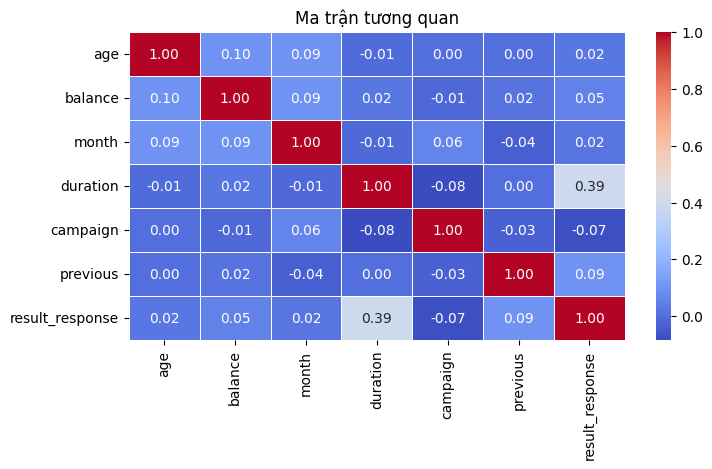

In [140]:
# Chuyển đổi cột 'previous' sang kiểu dữ liệu float
df['previous'] = df['previous'].astype(float)
# Chọn các cột quan tâm
selected_columns = ['age', 'balance', 'month', 'duration', 'campaign','previous', 'result_response']
df_selected = df[selected_columns]

# Tạo ma trận tương quan cho các cột đã chọn
correlation_matrix_selected = df_selected.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma trận tương quan')
plt.show()

Phân tích mối quan hệ giữa các biến phụ thuộc với biến mục tiêu:
- Rõ ràng, “kết quả chiến dịch” có mối tương quan chặt chẽ với “thời lượng”, tương quan vừa phải với “những lần liên hệ trước đó” và tương quan nhẹ giữa “số dư”.

## Mô hình hóa dữ liệu

#### Tỷ lệ đăng ký tiền gửi kỳ hạn với độ tuổi

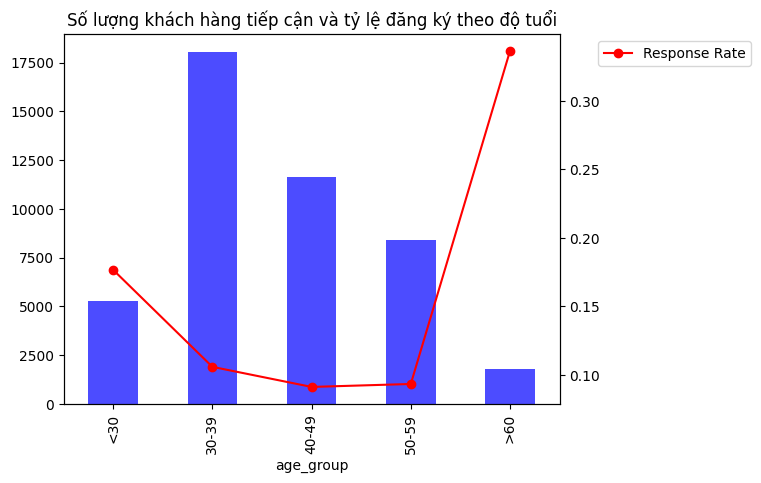

In [159]:
# Chia bins cho cột 'age'
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-39', '40-49', '50-59', '>60']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Tạo biểu đồ
fig, ax1 = plt.subplots()

# Biểu đồ tần suất của từng độ tuổi
df['age_group'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='blue', alpha=0.7)

# Thêm trục y phụ để biểu diễn tần suất của cột 'Result_response'
ax2 = ax1.twinx()
df.groupby('age_group')['result_response'].mean().plot(kind='line', marker='o', color='red', label='Response Rate')

# Đặt tên cho các trục và đồ thị
plt.title('Số lượng khách hàng tiếp cận và tỷ lệ đăng ký theo độ tuổi')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0))

plt.show()

Phân tích biểu đồ: Ngân hàng nên tập trung tiếp thị vào nhớ khách hàng nhỏ hơn 30 và lớn hơn 60 tuổi

 Qua biểu đồ trên, ta thấy nhóm khách hàng trên 60 tuổi có tỷ lệ đăng ký cao nhất trên 30% tiếp theo nhóm khách hàng nhỏ hơn 30 tuổi cũng có tỷ lệ đăng ký cao (khoảng 17%). Điều này có thể hiểu như sau: 
 - mục tiêu đầu tư chính của người lớn tuổi là tiết kiệm để nghỉ hưu trong khi nhóm trung niên có xu hướng quyết liệt hơn với mục tiêu chính là tạo ra thu nhập đầu tư cao. Tiền gửi có kỳ hạn, là công cụ đầu tư ít rủi ro nhất, được người lớn tuổi ưa chuộng hơn.
- Người trẻ nhất có thể không có đủ tiền hoặc kiến ​​thức chuyên môn để tham gia vào các khoản đầu tư phức tạp như cổ phiếu và quỹ tương hỗ. Tiền gửi có kỳ hạn mang lại tính thanh khoản và tạo ra thu nhập lãi cao hơn tài khoản tiết kiệm thông thường, vì vậy tiền gửi có kỳ hạn là khoản đầu tư lý tưởng cho sinh viên.

Tuy nhiên, dựa trên biểu đồ ta cũng thấy ngân hàng đang tập trung tiếp thị vào nhóm khách hàng từ 30 - 60 tuổi (nhóm khách hàng không có tỷ lệ gửi tiền gửi có kỳ hạn cao). Do đó, ngân hàng nên tập trung vào nhóm khách hàng nhỏ nhất và lớn nhất

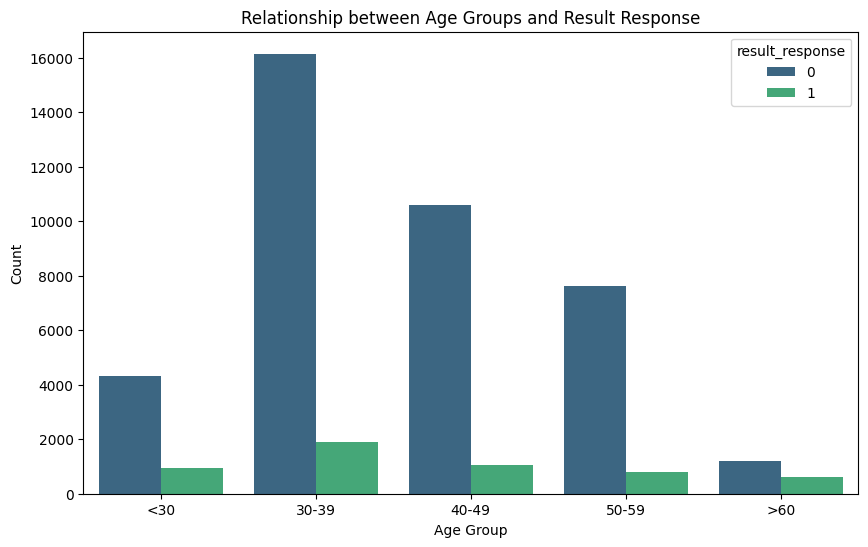

In [148]:
# Chia bins cho cột age
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-39', '40-49', '50-59', '>60']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='result_response', data=df, palette='viridis')

plt.title('Relationship between Age Groups and Result Response')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Qua biểu đồ này, ta cũng nhận thấy được khách hàng chủ yếu của ngân hàng tập trung từ 30 - 60 tuổi. Ngân hàng nên tập trung tìm kiếm những khách hàng ở độ tuổi có khả năng cao đăng ký tiền gửi có kỳ hạn để tăng hiệu quả của các chiến dịch tiếp thị

#### Tỷ lệ đăng ký tiền gửi kỳ hạn với số dư

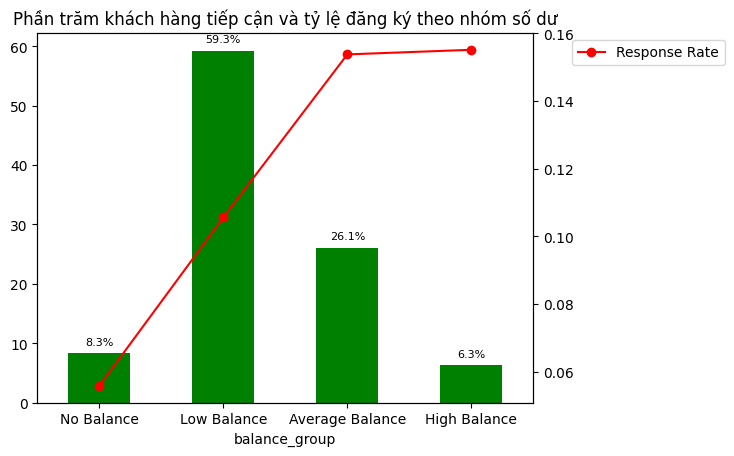

In [180]:

# Chia bins cho cột 'balance'
bins = [float('-inf'), 0, 1000, 5000, float('inf')]
labels = ['No Balance', 'Low Balance', 'Average Balance', 'High Balance']

df['balance_group'] = pd.cut(df['balance'], bins=bins, labels=labels, right=False)

# Tạo biểu đồ
fig, ax1 = plt.subplots()

# Biểu đồ phần trăm tần suất của từng nhóm số dư
percentages = df['balance_group'].value_counts(normalize=True).sort_index() * 100
percentages.plot(kind='bar', ax=ax1, color='green', alpha=1.0)  

# Thêm data labels cho mỗi cột trên trục y
for i, v in zip(ax1.patches, percentages):
    ax1.text(i.get_x() + i.get_width() / 2, i.get_height() + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=8, color='black', rotation=0)

# Thiết lập xoay chữ trên trục x
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Thêm trục y phụ để biểu diễn tỷ lệ trung bình của cột 'result_response'
ax2 = ax1.twinx()
df.groupby('balance_group')['result_response'].mean().plot(kind='line', marker='o', color='red', label='Response Rate')

# Đặt tên cho các trục và đồ thị
plt.title('Phần trăm khách hàng tiếp cận và tỷ lệ đăng ký theo nhóm số dư')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0))

plt.show()

Phân tích biểu đồ: Ngân hàng nên tập trung vào hóm khách hàng có số dư trung bình và cao
- Ta thấy được nhóm khách hàng có số dư trung bình và cao sẽ có khả năng đăng ký tiền gửi có kỳ hạng cao nhất (trên 15%). ta cũng thấy ngân hàng đang tập trung vào nhóm khách hàng có số dư trung bình, tuy nhiên, nhóm khách hàng này có tỷ lệ đăng ký tiền gửi có kỳ hạn không cao, ngân hàng nên điều chỉnh để có kết quả tiếp thị tốt nhất

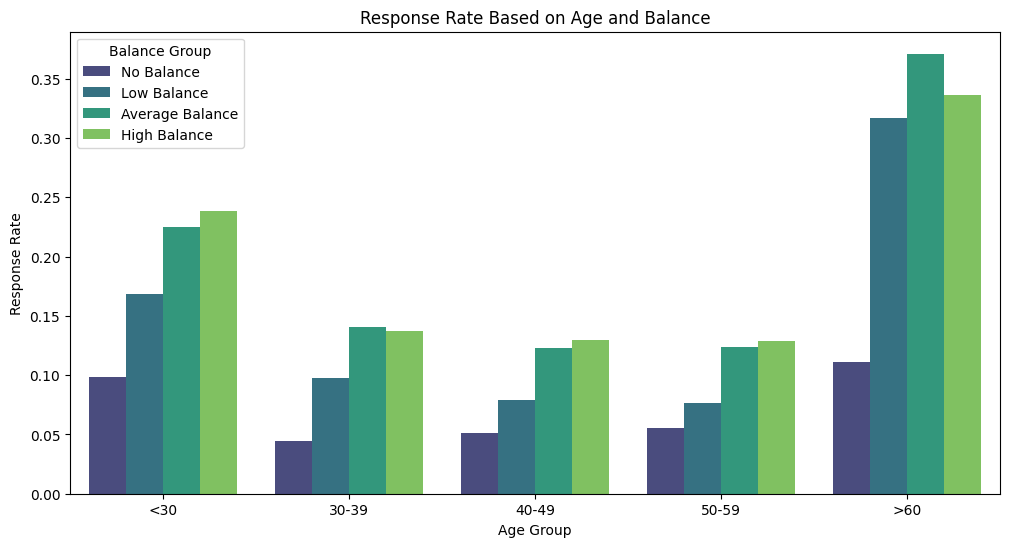

In [188]:
# Chia bins cho cột 'age'
age_bins = [float('-inf'), 30, 40, 50, 60, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50-59', '>60']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Chia bins cho cột 'balance'
balance_bins = [float('-inf'), 0, 1000, 5000, float('inf')]
balance_labels = ['No Balance', 'Low Balance', 'Average Balance', 'High Balance']
df['balance_group'] = pd.cut(df['balance'], bins=balance_bins, labels=balance_labels, right=False)

# Tạo DataFrame cho biểu đồ
data_for_plot = df.groupby(['age_group', 'balance_group'])['result_response'].mean().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='result_response', hue='balance_group', data=data_for_plot, palette='viridis')

# Đặt tên cho biểu đồ và các trục
plt.title('Response Rate Based on Age and Balance')
plt.xlabel('Age Group')
plt.ylabel('Response Rate')
plt.legend(title='Balance Group')

# Hiển thị biểu đồ
plt.show()

### Tổng kết lại,
Biểu đồ trên đã tổng kết lại các kết luận ở trên là ngân hàng nên tập trung vào 2 đối tượng khách hàng:
- Khách hàng lớn hơn 60 tuổi và có số dư trung bình hoặc cao, đây là nhóm khách hàng có tỷ lệ đăng ký cao nhất (khoảng hơn 30%)
- Khách hàng nhỏ hơn 30 tuổi và có số dư trung bình hoặc cao, tỷ lệ đăng ký của nhóm này cũng khá cao (trên 20%)

### Tỷ lệ đăng ký theo job

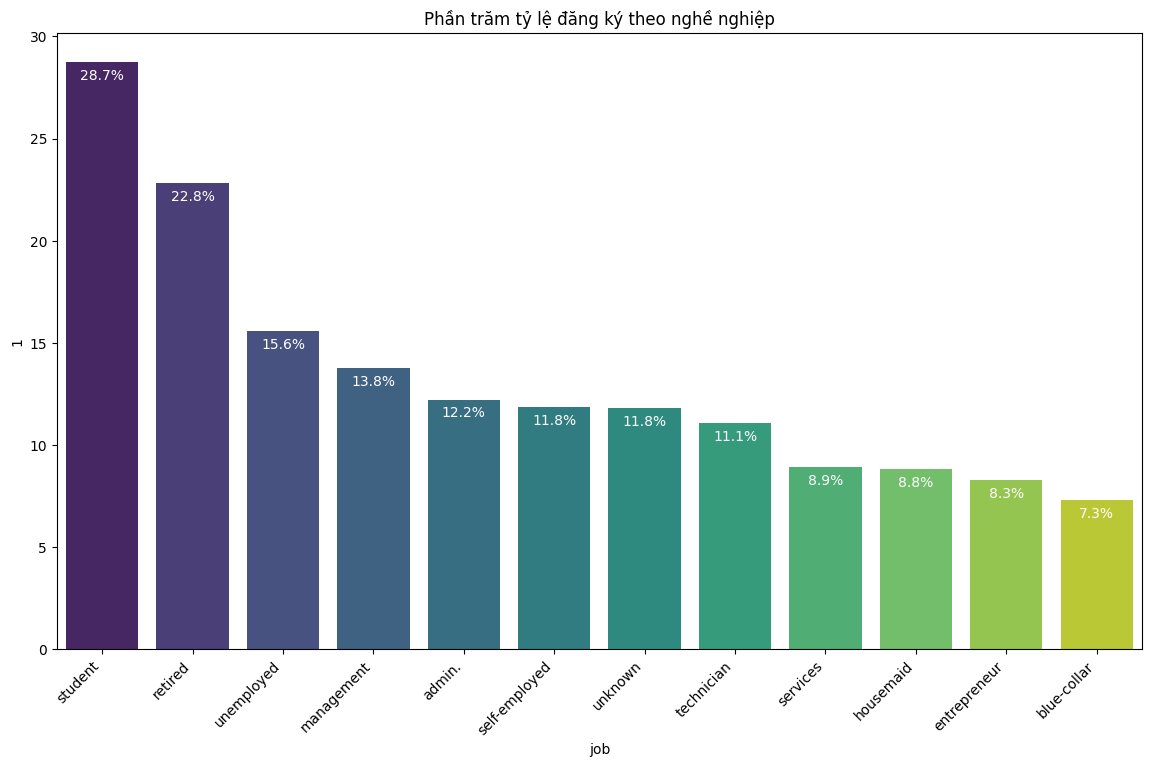

In [209]:
# Tạo DataFrame cho biểu đồ
data_for_plot = df.groupby(['job', 'result_response']).size().unstack()

# Tính tỷ lệ phần trăm tần suất của 'job'
data_for_plot_percentage = data_for_plot.apply(lambda x: x / x.sum() * 100, axis=1)

# Sắp xếp DataFrame theo tần suất xuất hiện của 'result_response' bằng 1 (cột '1')
data_for_plot_percentage = data_for_plot_percentage.sort_values(by=1, ascending=False)

# Vẽ biểu đồ cột và đặt edgecolor thành None để xóa viền
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=data_for_plot_percentage.index, y=data_for_plot_percentage[1], palette='viridis', edgecolor=None)

# Đặt nhan đề và tên trục
plt.title('Phần trăm tỷ lệ đăng ký theo nghề nghiệp')

# Thêm data labels cho mỗi cột
for i, v in enumerate(data_for_plot_percentage[1]):
    ax.text(i, v - 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10, color='white', rotation=0)

# Quay chữ trên trục x để dễ đọc
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.show()

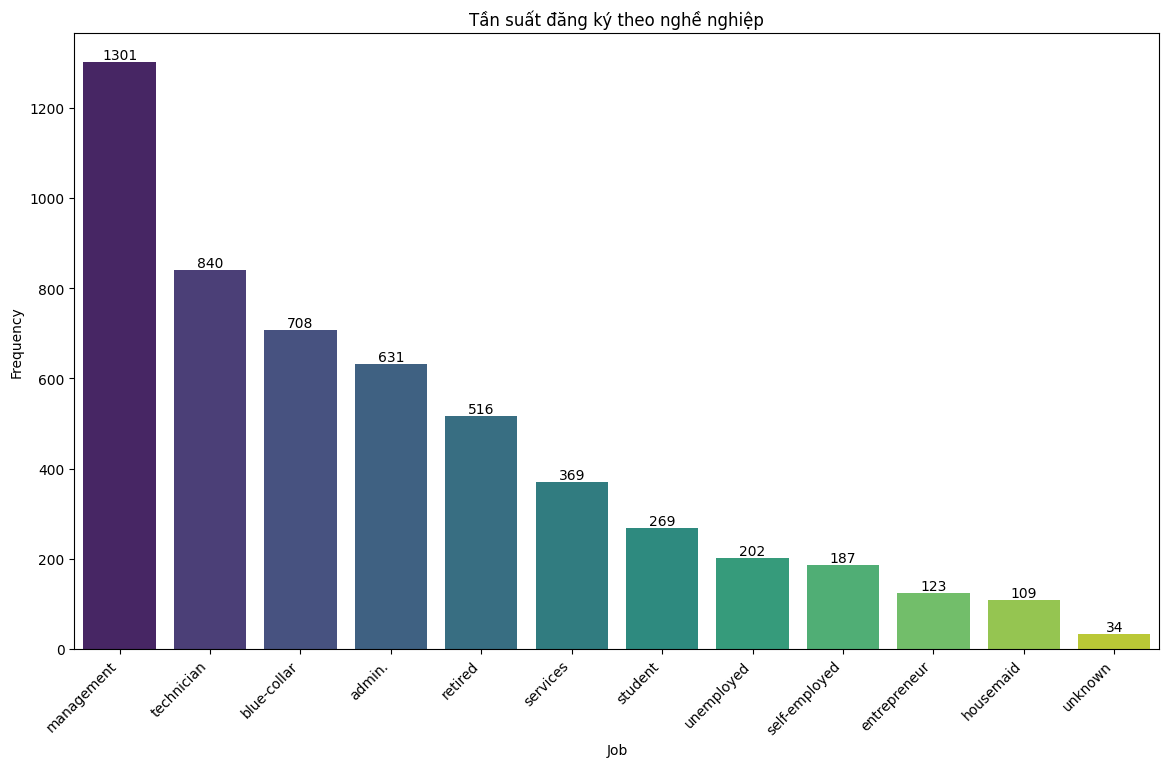

In [210]:
# Sắp xếp DataFrame theo tần suất xuất hiện của 'result_response' bằng 1 (cột '1')
data_for_plot = data_for_plot.sort_values(by=1, ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=data_for_plot.index, y=data_for_plot[1], palette='viridis')

# Đặt nhan đề và tên trục
plt.title('Tần suất đăng ký theo nghề nghiệp')
plt.xlabel('Job')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.xticks(rotation=45, ha='right')  # Quay chữ trên trục x để dễ đọc

# Thêm data labels cho mỗi cột
for i, v in enumerate(data_for_plot[1]):
    ax.annotate(f"{v}", (i, v), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


Phân tích biểu đồ:
- Qua 2 biểu đồ trên, ta thấy sinh viên và người nghỉ hưu có tỷ lệ đăng ký tiền gửi có kỳ hạn cao lần lượt là 28.7% và 22.8%. Nếu xét về số lượng khách hàng có nghề nghiệp là 'management' có số lượt đăng ký nhiều nhất là 1301 nhưng tỷ lệ đăng ký không quá cao (13,8%)
- Kết luận: ngân hàng nên tập trung vào khách hàng là học sinh và người nghỉ hưu để có thể phát triển lâu dài